In [1]:
%matplotlib widget

# Session 3

## X-ray source parameters ![gVXR](../img/gvxr_logo.png)

## Authors: Franck Vidal

(version 1.0, 8 Oct 2022)

# Aims of this session

- Create X-ray sources of different shapes:
    - Parallel beam (e.g. synchrotron);
    - Cone-beam (e.g. X-ray tube);
        - Ideal case, i.e. infinitesimal point source;
        - Focal spot, i.e. more realistic.
- Visualise the source shape;
- Set the beam spectrum:
    - Monochromatic;
    - Polychromatic:
        - By hand;
        - Using a text file;
        - Using [xpecgen](https://github.com/Dih5/xpecgen) (a python package to calculate x-ray spectra generated in tungsten anodes using the model of [Med. Phys. 43, 4655.](https://doi.org/10.1118/1.4955120)).

# Task 1: Initialise the simulation environment

By now, we should all be able to set up the simulation environment on our own.

1. Import the packages;
2. Create the OpenGL context with `gvxr.createWindow`;
3. Set the detector with `gvxr.setDetectorPosition`;
4. Set the detector up vector with `gvxr.setDetectorUpVector`;
5. Set the number of pixels with `gvxr.setDetectorNumberOfPixels`;
6. Set the pixel spacing with `gvxr.setDetectorPixelSize`;
7. Load the following samples.

---

### Step 1 of Task 1: Import the packages

In [2]:
import numpy as np

import matplotlib.pyplot as plt # Plotting`

from gvxrPython3 import gvxr # Simulate X-ray images`
from gvxrPython3 import json2gvxr # Set the simulation parameters using a JSON file

spekpy is not install, you won't be able to load a beam spectrum using spekpy
SimpleGVXR 2.0.2 (2022-10-07T20:46:36) [Compiler: Apple Clang] on Darwin
gVirtualXRay core library (gvxr) 2.0.2 (2022-10-07T20:46:34) [Compiler: Apple Clang] on Darwin


---

### Step 2 of Task 1: Create the OpenGL context

We may use `gvxr.createWindow`.

In [3]:
json2gvxr.initGVXR("notebook4-point_source.json", "EGL")

Create an OpenGL context: 800x450


Sun Oct  9 22:07:47 2022 ---- Create window (ID: -1)
Sun Oct  9 22:07:47 2022 ---- Initialise GLFW
Sun Oct  9 22:07:47 2022 ---- Create an OpenGL window with a 3.2 context.
Sun Oct  9 22:07:47 2022 ---- Make the window's context current
Sun Oct  9 22:07:47 2022 ---- Initialise GLEW
Sun Oct  9 22:07:47 2022 ---- OpenGL vendor: Intel Inc.
Sun Oct  9 22:07:47 2022 ---- OpenGL renderer: Intel(R) Iris(TM) Plus Graphics 650
Sun Oct  9 22:07:47 2022 ---- OpenGL version: 4.1 INTEL-16.4.5
Sun Oct  9 22:07:47 2022 ---- Cannot use OpenGL 4.5. You live in the past.
Sun Oct  9 22:07:47 2022 ---- Use OpenGL 3.2.
Sun Oct  9 22:07:47 2022 ---- Initialise the X-ray renderer if needed and if possible


--- 

### Steps 3-6 of Task 1: Set the detector parameters

In [4]:
json2gvxr.initDetector()

Set up the detector
	Detector position: [0, 0, -5, 'cm']
	Detector up vector: [0, 1, 0]
	Detector number of pixels: [600, 600]
	Pixel spacing: [0.25, 0.25, 'mm']


--- 

### Step 7 of Task 1: Load the samples and their material properties

In [5]:
json2gvxr.initSamples("notebook4-point_source.json")

Sun Oct  9 22:07:47 2022 ---- file_name:	/Users/eese10/PROGRAMMING/GitHub/gvxr-ibsim-4i-2022/input_data/phantoms/plate_sphere_inserts/matrix.stl	nb_faces:	9702	nb_vertices:	29106	bounding_box (in cm):	(-3.5, -3.5, -0.75)	(3.5, 3.5, 0.75)
Sun Oct  9 22:07:47 2022 ---- file_name:	/Users/eese10/PROGRAMMING/GitHub/gvxr-ibsim-4i-2022/input_data/phantoms/plate_sphere_inserts/col_0.stl	nb_faces:	1938	nb_vertices:	5814	bounding_box (in cm):	(-2.99606, -2.19961, -0.496354)	(-2, 2.49901, 0.496354)
Sun Oct  9 22:07:47 2022 ---- file_name:	/Users/eese10/PROGRAMMING/GitHub/gvxr-ibsim-4i-2022/input_data/phantoms/plate_sphere_inserts/col_1.stl	nb_faces:	1938	nb_vertices:	5814	bounding_box (in cm):	(-1.74606, -2.19961, -0.496354)	(-0.75, 2.49901, 0.496354)
Sun Oct  9 22:07:47 2022 ---- file_name:	/Users/eese10/PROGRAMMING/GitHub/gvxr-ibsim-4i-2022/input_data/phantoms/plate_sphere_inserts/col_2.stl	nb_faces:	1938	nb_vertices:	5814	bounding_box (in cm):	(-0.496057, -2.19961, -0.496354)	(0.5, 2.49901, 0.

<div class="alert alert-block alert-warning">
    <b>Note:</b> We want to change the colour of the matrix. Indeed, it embeds inner objects (spheres) that are not visible in the 3D visualisation if its surface remain fully opaque. We can change the colour of the matrix using `gvxr.setColour(ID, red, green, blue, opacity)`, making sure `opacity` is less than 1.
</div>


---

### Task 2: Set the source parameters

- Spectrum,
- Point source.

```json
    "Source": {
        "Shape": "PointSource",
        "Position": [0, 0, 20, "cm"],
        "Beam": [
            {
                "Energy": 100,
                "Unit": "keV",
                "PhotonCount": 1
            }
        ]
    },
```

In [6]:
json2gvxr.initSourceGeometry()
json2gvxr.initSpectrum()

Set up the beam
	Source position: [0, 0, 20, 'cm']
	Source shape: PointSource


Sun Oct  9 22:07:48 2022 ---- Initialise the renderer


({100: 1}, 'keV', array([100]), array([1]))

In [7]:
xray_image_point_source = gvxr.computeXRayImage()
gvxr.displayScene()
screenshot_point_source = gvxr.takeScreenshot()

---

### Task: Reload the source parameters (other JSON file)

- Spectrum,
- Parallel source.

```json
    "Source": {
        "Shape": "Parallel",
        "Position": [0, 0, 20, "cm"],
        "Beam": [
            {
                "Energy": 100,
                "Unit": "keV",
                "PhotonCount": 1
            }
        ]
    },
```

In [8]:
json2gvxr.initSourceGeometry("notebook4-parallel_beam.json")
xray_image_parallel_source = gvxr.computeXRayImage()
gvxr.displayScene()
screenshot_parallel_source = gvxr.takeScreenshot()

Set up the beam
	Source position: [0, 0, 20, 'cm']
	Source shape: Parallel


---

### Task: Reload the source parameters (other JSON file)

- Spectrum,
- Cone-beam geometry with a focal spot.

```json
    "Source": {
        "Shape": ["FocalSpot", 5.0, "mm", 3],
        "Position": [0, 0, 20, "cm"],
        "Beam": [
            {
                "Energy": 100,
                "Unit": "keV",
                "PhotonCount": 1
            }
        ]
    },
```

In [9]:
json2gvxr.initSourceGeometry("notebook4-focal_spot.json")
xray_image_focal_spot = gvxr.computeXRayImage()
gvxr.displayScene()
screenshot_focal_spot = gvxr.takeScreenshot()

Set up the beam
	Source position: [0, 0, 20, 'cm']
	Source shape: ['FocalSpot', 5.0, 'mm', 3]


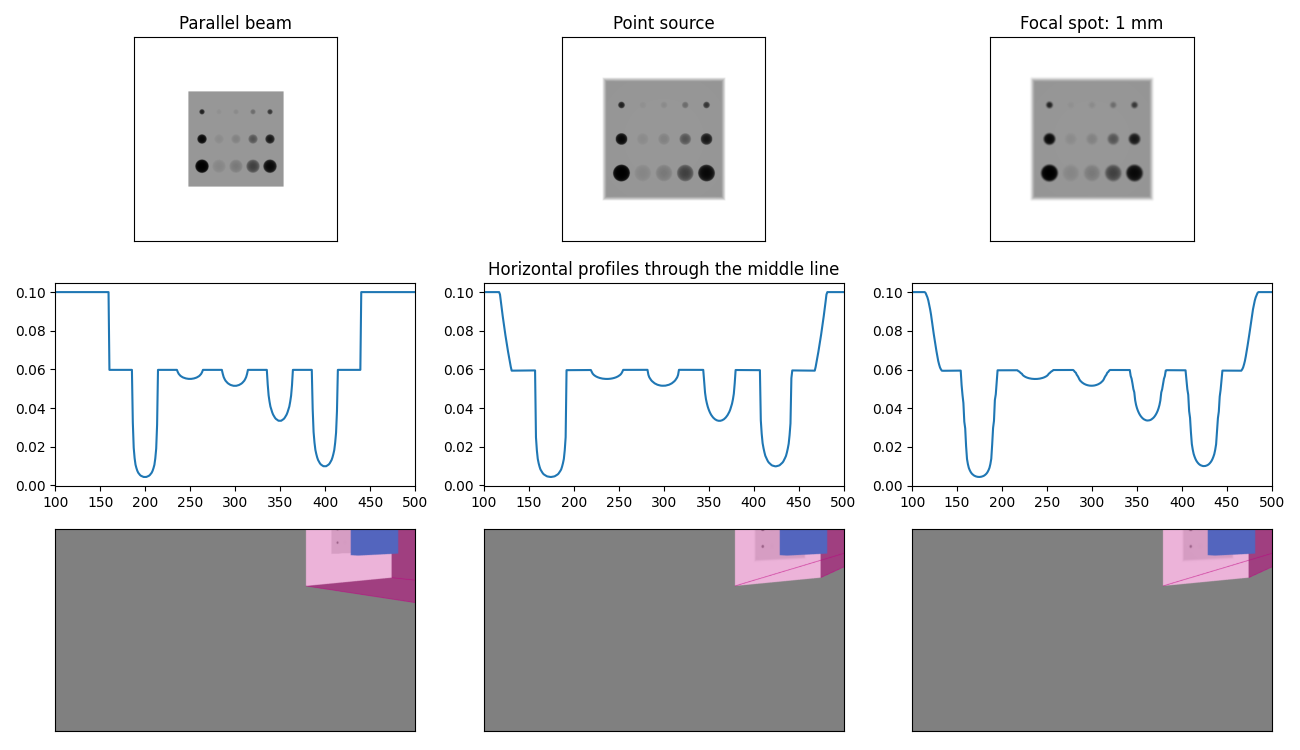

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(13, 7.5))

axs[0, 0].imshow(xray_image_parallel_source, cmap="gray")
axs[0, 0].set_title("Parallel beam")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(xray_image_point_source, cmap="gray")
axs[0, 1].set_title("Point source")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[0, 2].imshow(xray_image_focal_spot, cmap="gray")
axs[0, 2].set_title("Focal spot: 1 mm")
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])

axs[1, 0].plot(xray_image_parallel_source[300])
axs[1, 0].set_xlim([100, 500])

axs[1, 1].plot(xray_image_point_source[300])
axs[1, 1].set_title("Horizontal profiles through the middle line")
axs[1, 1].set_xlim([100, 500])

axs[1, 2].plot(xray_image_focal_spot[300])
axs[1, 2].set_xlim([100, 500])

axs[2, 0].imshow(screenshot_parallel_source)
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])

axs[2, 1].imshow(screenshot_point_source)
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])

axs[2, 2].imshow(screenshot_focal_spot)
axs[2, 2].set_xticks([])
axs[2, 2].set_yticks([])

plt.tight_layout()
plt.margins(0,0)

<div class="alert alert-block alert-warning">
    <b>Note:</b> Larger focal spots will introduce more blur. It may be necessary to increase the sampling rate of the focal spot (i.e. increase the value of N) to avoid some aliasing.
</div>

# X-ray spectra

## Monochromatic

```json
```

## Polychromatic

```json
    "Source": {
        "Shape": "Parallel",
        "Position": [0, 0, 20, "cm"],
        "Beam": [
            {
                "Energy": 100,
                "Unit": "keV",
                "PhotonCount": 1
            }
        ]
    },
```

### Synchrotron

```json
    "Source": {
        "Shape": "Parallel",
        "Position": [0, 0, 20, "cm"],
        "Beam": [
            {
                "Energy": 33,
                "Unit": "keV",
                "PhotonCount": 0.97
            },
            
            {
                "Energy": 66,
                "Unit": "keV",
                "PhotonCount": 0.02
            },
            
            {
                "Energy": 99,
                "Unit": "keV",
                "PhotonCount": 0.01
            }
        ]
    },
```

### X-ray tube

#### Unfiltered

```json
    "Source": {
        "Shape": ["FocalSpot", 5.0, "mm", 3],
        "Position": [0, 0, 20, "cm"],
        "Beam": {
            "kvp": 100,
            "tube angle": 12
        }
    },
        
```

#### Filtered

```json
    "Source": {
        "Shape": ["FocalSpot", 5.0, "mm", 3],
        "Position": [0, 0, 20, "cm"],
        "Beam": {
            "kvp": 100,
            "tube angle": 12,
            "filters": [
                ["Cu", 5]
            ]
        }
    },
        
```

---
### Task:

1. Click on "Run Interact" below to generate the X-ray spectrum of an X-ray tube with a tungsten anode for a 100 kV tube voltage.
2. Change the tube voltage to 90 kV and click on "Run Interact". How did the figure change?
3. Change the tube voltage to 80 kV and click on "Run Interact". How did the figure change?
4. Change it back to 100 kV and add a plate of 5mm of copper, then click on "Run Interact". How did the figure change compare to the initial spectrum without the copper plate?

In [11]:
def getAverageEnergy(k, f):
    
    avg = 0
    for energy, count in zip(k, f):
        avg += energy * count
        
    return avg / np.sum(f)

In [12]:
spectrum_unfiltered, units, k_unfiltered, f_unfiltered = json2gvxr.initSpectrum("notebook4-tube_spectrum-100_unfiltered.json")
xray_image_100kV_unfiltered = np.array(gvxr.computeXRayImage()) / gvxr.getTotalEnergyWithDetectorResponse()
average_energy_unfiltered = getAverageEnergy(k_unfiltered, f_unfiltered)
print("Average energy:", average_energy_unfiltered, units)

Average energy: 51.12002177412025 keV


In [13]:
spectrum_filtered, units, k_filtered, f_filtered = json2gvxr.initSpectrum("notebook4-tube_spectrum-100_filtered.json")
xray_image_100kV_filtered = np.array(gvxr.computeXRayImage()) / gvxr.getTotalEnergyWithDetectorResponse()

average_energy_filtered = getAverageEnergy(k_filtered, f_filtered)
print("Average energy:", average_energy_filtered, units)

Average energy: 51.12002177412025 keV


In [14]:
gvxr.setMonoChromatic(51, "keV", 1)
xray_image_51keV = np.array(gvxr.computeXRayImage()) / gvxr.getTotalEnergyWithDetectorResponse()

gvxr.setMonoChromatic(81, "keV", 1)
xray_image_81keV = np.array(gvxr.computeXRayImage()) / gvxr.getTotalEnergyWithDetectorResponse()

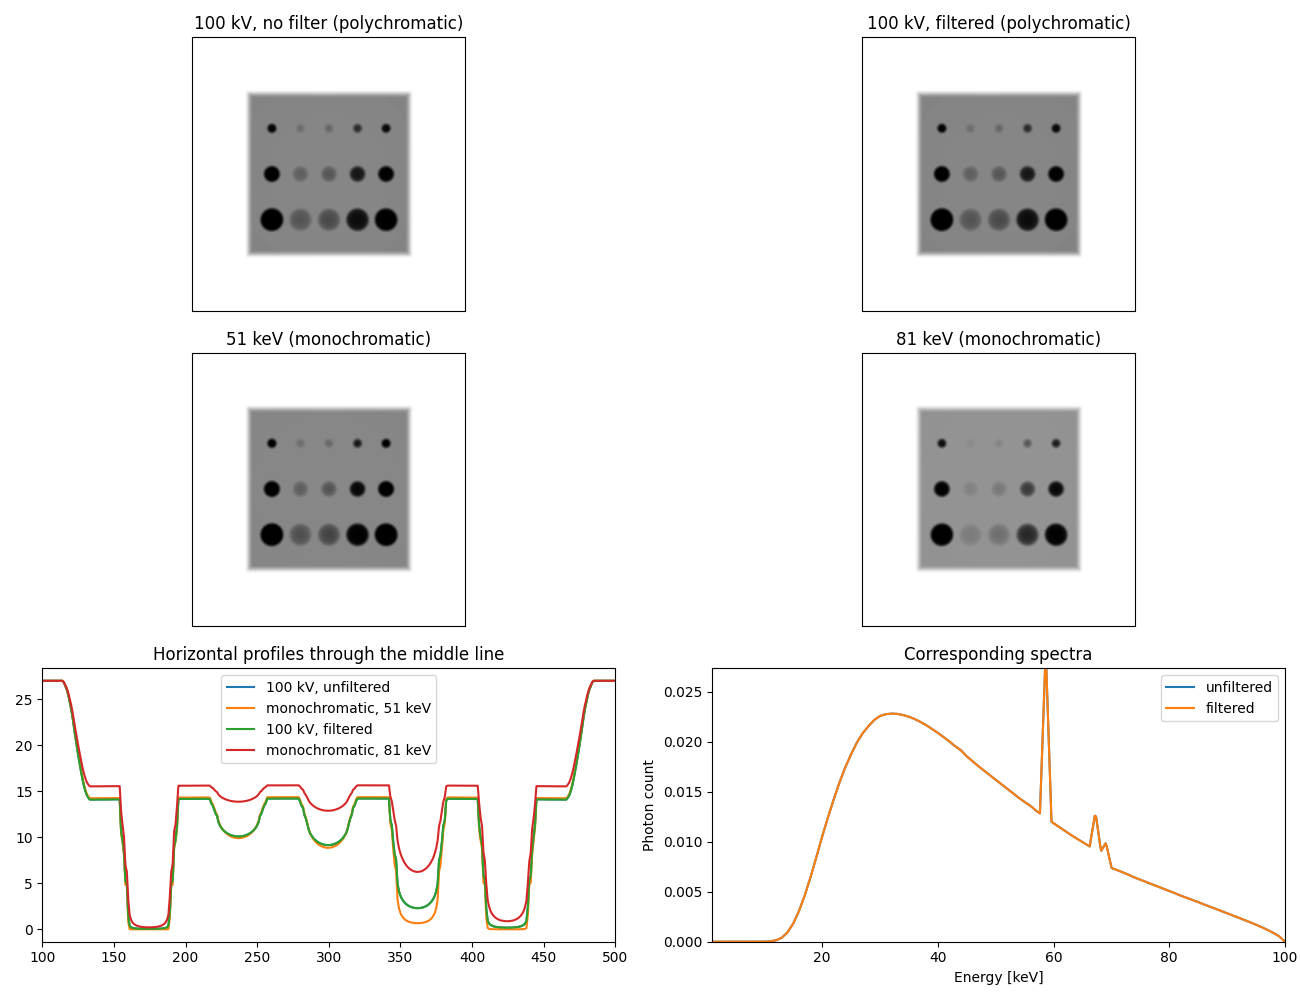

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(13, 10))

axs[0, 0].imshow(xray_image_100kV_unfiltered, cmap="gray")
axs[0, 0].set_title("100 kV, no filter (polychromatic)")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(xray_image_100kV_filtered, cmap="gray")
axs[0, 1].set_title("100 kV, filtered (polychromatic)")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(xray_image_51keV, cmap="gray")
axs[1, 0].set_title("51 keV (monochromatic)")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(xray_image_81keV, cmap="gray")
axs[1, 1].set_title("81 keV (monochromatic)")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

axs[2, 0].plot(xray_image_100kV_unfiltered[300], label="100 kV, unfiltered")
axs[2, 0].plot(xray_image_51keV[300], label="monochromatic, 51 keV")
axs[2, 0].plot(xray_image_100kV_filtered[300], label="100 kV, filtered")
axs[2, 0].plot(xray_image_81keV[300], label="monochromatic, 81 keV")
axs[2, 0].set_xlim([100, 500])
axs[2, 0].legend()
axs[2, 0].set_title("Horizontal profiles through the middle line")


axs[2, 1].plot(k_unfiltered, f_unfiltered, label="unfiltered")
axs[2, 1].plot(k_filtered, f_filtered, label="filtered")
axs[2, 1].set_xlabel("Energy [" + units + "]")
axs[2, 1].set_ylabel("Photon count")
axs[2, 1].legend()
axs[2, 1].set_title("Corresponding spectra")

plt.tight_layout()
plt.margins(0,0)

From the profiles, we can see that the filtered beam spectrum and the corresponding monochromatic beam provide similar simulation results. This is, however, not the case for the filtered beam spectrum. The blue and orange curve differ significantly for the 4th sphere.

In [16]:
gvxr.terminate()

Sun Oct  9 22:08:26 2022 ---- Destroy all the windows
Sun Oct  9 22:08:26 2022 ---- Destroy window 0(0x7f82044eae50)
